# What genre is more popular among amazon readers, fiction or non-fiction?
Date source: [Amazon Top 50 Bestselling Books 2009 - 2019](https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019)



In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt
import matplotlib.pyplot as plt
sns.set_theme(palette='Set1')

In [192]:
df=pd.read_csv('bestsellers with categories.csv')
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [194]:
df.duplicated().any()

False

In [470]:
# year_genre_count = df.groupby(['Year','Genre']).count().reset_index()
# fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(16,8))
# sns.barplot(x='Year', y='Name',data=year_genre_count, hue='Genre',palette='RdBu_r', ax=ax1)
# ax1.set_title('Number of bestselling books per genre')

# year_genre_ratings = df.groupby(['Year','Genre']).mean().reset_index()
# sns.barplot(x='Year', y='Price',data=year_genre_ratings, hue='Genre',palette='RdBu_r', ax=ax2)
# sns.barplot(x='Year', y='User Rating',data=year_genre_ratings, hue='Genre',palette='RdBu_r', ax=ax3)
# plt.tight_layout()

### Fiction vs non-fiction

Text(0.5, 1.0, 'number of reviews per genre')

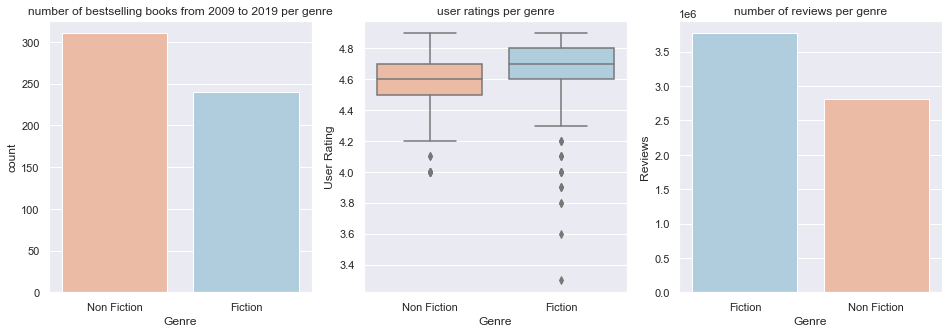

In [449]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(16,5))
sns.countplot(x=df.Genre, palette='RdBu', ax=ax1)
ax1.set_title('number of bestselling books from 2009 to 2019 per genre')

sns.boxplot(x='Genre', y='User Rating',data=df, ax=ax2,palette='RdBu')
ax2.set_title('user ratings per genre')

count_review_by_genre = df.groupby('Genre')['Reviews'].sum().to_frame()
sns.barplot(x=count_review_by_genre.index, y=count_review_by_genre['Reviews'], ax=ax3,palette='RdBu_r')
ax3.set_title('number of reviews per genre')

- From the graphs above we can see that the total number of non-fictional books in Amazon bestselling list from 2009 to 2019 is more than the number of fictional books. 

- We also can see that non-fictional bestseller books have a minimum rating of 4 with median of 4.6. The minimum rating of the fictional bestseller books is as low as 3.2 with median of 4.7 showing that although a fiction book can be a best seller some readers might strongly dislike it.

- Readers of fictional books write more reviews than readers of non-fictional books.

### Who are the authors with the highest number of bestselling books

<AxesSubplot:xlabel='Count', ylabel='Author'>

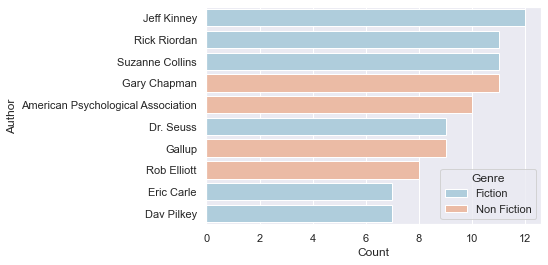

In [467]:
count_by_author = df.groupby(by=['Author', 'Genre'])['Name'].count().sort_values(ascending=False).reset_index()[:10]
count_by_author.rename(columns={'Name':'Count'}, inplace=True)
sns.barplot(x='Count', y='Author', data=count_by_author, hue='Genre', orient='h', dodge=False, palette='RdBu_r')

### Relationships between price, user ratings, and numbre of reviews 

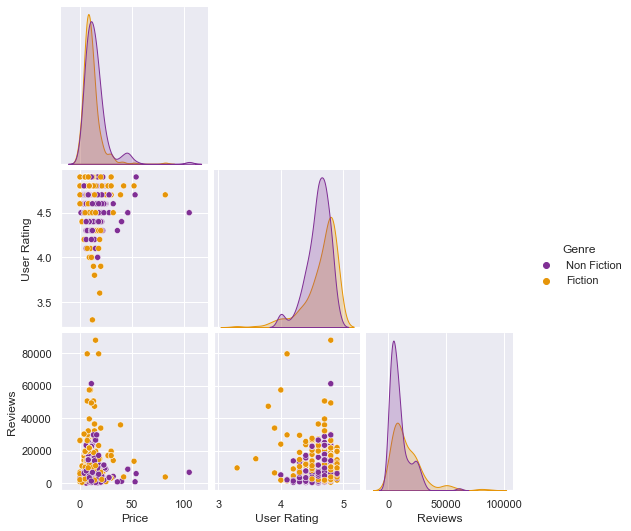

In [465]:
sns.pairplot(df[['Price', 'User Rating', 'Reviews', 'Genre']], hue='Genre', corner=True, palette='CMRmap')

### Amazon best selling books by genre over time 

Text(0.5, 1.0, 'Number Over Time')

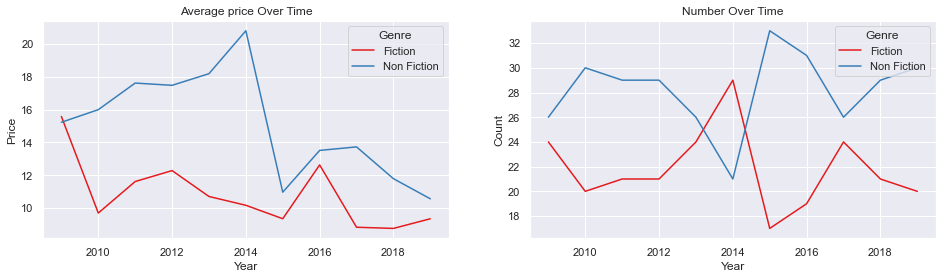

In [472]:
# has the number of submitted reviews changed over time?
price_by_genre_over_time = df.groupby(['Year','Genre']).agg({'Price':np.mean, 'Reviews':sum, 'Name':'count'}).reset_index()
price_by_genre_over_time.rename(columns={"Name":'Count'}, inplace=True)
price_by_genre_over_time.head()

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,4))
sns.lineplot(x='Year', y='Price', data=price_by_genre_over_time, hue='Genre', ax=ax1)
ax1.set_title('Average price Over Time')

sns.lineplot(x='Year', y='Count', data=price_by_genre_over_time, hue='Genre', ax=ax2)
ax2.set_title('Number Over Time')

We can see in general that price of non-fiction books are higher than the fiction books. In 2014 the difference between the average cost of a fictional vs non fictional books reached it's maximum. We also can see that in the same year the number of non fictional books in Amazon to 50 bestselling books decreased. We can check to see if there is a correlation between the price and numbre of books in the Amazon bestselling list by genre.

### Correlation between price and bestselling books

Text(0.5, 1.0, 'Non Fiction')

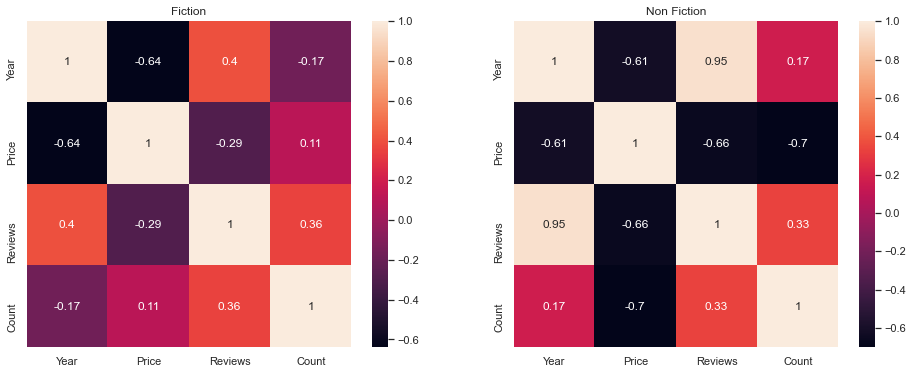

In [448]:
fig, (ax1,ax2) =plt.subplots(1,2, figsize=(16,6))
sns.heatmap(price_by_genre_over_time[price_by_genre_over_time.Genre=='Fiction'].corr(), ax=ax1, annot=True)
ax1.set_title('Fiction')
sns.heatmap(price_by_genre_over_time[price_by_genre_over_time.Genre=='Non Fiction'].corr(), ax=ax2, annot=True)
ax2.set_title('Non Fiction')

### Conclusion:
There is a strong correlation between price and number of non-fiction books in Amazon top 50 bestselling books. It appears that in general Amazon readers prefer non-fictional book as long as the price is not high.